In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams.update({'font.size': 20})
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

In [4]:
eel = pd.read_csv('../tabelas_test/est_est_log_2019-06-18.csv', index_col='id')
eel.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
1,1408122540,Giovanny,Swiss A,3,m,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
2,1408122540,Giovanny,Swiss A,2,f,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
3,1408122540,Giovanny,Swiss B,3,m,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
4,1408122540,Giovanny,Swiss B,3,f,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
5,1408122540,Giovanny,Swiss B,4,f,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA


In [5]:
eel['util'].value_counts()

sex      6016
trans    3259
acas     2753
desc     2380
nasc     1810
forn     1334
inser     659
AAA        82
Name: util, dtype: int64

In [6]:
#Filtrando coluna com as condições

num_nasc = eel[(eel['util'] == 'nasc') & (eel['num_nasc'] < 200)]

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++=

#lista com nome das colunas referentes a datas
datas = ['date_hoje', 
         'date_nasc', 
         'data_inicio', 
         'date_acas', 
         'date_nasc_acas', 
         'date_sex', 
         'data_solic', 
         'data_forn', 
         'data_fim']

#laço que em c percorre em datas e padronizando tudo em formato de data pela função to_datetime
for c in datas:
    num_nasc[c] = pd.to_datetime(num_nasc[c], unit = 's') #indica o formato das datas
    
num_nasc.head()

/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
116,2014-09-23 17:40:33,Tania,Swiss E,5,AAA,1970-01-01 00:11:06,54,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:33,5,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
117,2014-09-23 17:40:33,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,56,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:33,10,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
118,2014-09-23 17:40:33,Tania,Swiss C,20,AAA,1970-01-01 00:11:06,62,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:46:07,2014-09-23 17:40:33,20,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
119,2014-09-23 17:40:47,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,116,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:47,10,2014-10-14 17:40:47,666,666,666,666,AAA,AAA
120,2014-09-23 17:40:47,Tania,Swiss E,20,AAA,1970-01-01 00:11:06,117,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:47,20,2014-10-14 17:40:47,666,666,666,666,AAA,AAA


In [7]:
ling_ex = [
    'Test',
    'AAA',
    'Swiss',
    'C57BL06WT\t',
    'Swiss/CFW B',
    'Swiss/CFW D',
    'Swiss/CFW A',
    'Swiss/CFW C',
    'Swiss/CFW',
    'Swiss-2',
    'Swiss-2 A ',
    'NZB/BINJ',
    'NZW/LacJ',
    'NOD / SHILTJ'
]

tirar_ling = num_nasc[
    (num_nasc['ling'] != ling_ex[0]) &
    (num_nasc['ling'] != ling_ex[1]) &
    (num_nasc['ling'] != ling_ex[2]) &
    (num_nasc['ling'] != ling_ex[3]) &
    (num_nasc['ling'] != ling_ex[4]) &
    (num_nasc['ling'] != ling_ex[5]) &
    (num_nasc['ling'] != ling_ex[6]) &
    (num_nasc['ling'] != ling_ex[7]) &
    (num_nasc['ling'] != ling_ex[8]) &
    (num_nasc['ling'] != ling_ex[9]) &
    (num_nasc['ling'] != ling_ex[10]) &
    (num_nasc['ling'] != ling_ex[11]) &
    (num_nasc['ling'] != ling_ex[12]) &
    (num_nasc['ling'] != ling_ex[13])
]
len(tirar_ling)

1785

In [8]:
ling_ex = [
    'Test',
    'AAA',
    'Swiss',
    'C57BL06WT\t',
    'Swiss/CFW B',
    'Swiss/CFW D',
    'Swiss/CFW A',
    'Swiss/CFW C',
    'Swiss/CFW',
    'Swiss-2',
    'Swiss-2 A ',
    'NZB/BINJ',
    'NZW/LacJ',
    'NOD / SHILTJ'
]

#Fiz uma condição para que as linhagens da lista acima fosse filtradas e descartadas da análise

if all(num_nasc['ling']!= tuple(ling_ex)): #função all(iterável)`Retorna `True` se todos os elementos do iterável forem verdadeiros (ou se o iterável for vazio).
    #Transformei a lista numa tupla pq o tamanho como lista estava interferindo, resultando em erro
    print ('deu') #caso fosse TRUE
else:
    print('nao deu') #se não fosse, era pra printar que "não deu"


deu


In [9]:
#Dataframe para série temporal

serie_temp_ling = pd.DataFrame(tirar_ling['date_hoje'])
serie_temp_ling['ling'] = tirar_ling['ling'] #criação da DataFrame "tirar_ling com a coluna de data"
serie_temp_ling['num_nasc'] = tirar_ling['num_nasc']#criação de coluna(serie_temp) que estará inserida na DataFrame
serie_temp_ling = serie_temp_ling.set_index('date_hoje') #identificando a nova coluna como index data_hoje
serie_temp_ling.head()

,ling,num_nasc
date_hoje,,
2014-09-23 17:40:33,Swiss E,5
2014-09-23 17:40:33,Swiss E,10
2014-09-23 17:40:33,Swiss C,20
2014-09-23 17:40:47,Swiss E,10
2014-09-23 17:40:47,Swiss E,20


In [10]:
#Substituindo linhagens  - ' S129WT', 'S129WT'] PARA '129/SV-E'

serie_temp_ling['ling'].replace([' S129WT', 'S129WT'], '129/SV-E', inplace=True)
serie_temp_ling[(serie_temp_ling['ling'] == '129/SV-E')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''

#Substituindo linhagens  - ' S129KO'  PARA 'S129KO'

serie_temp_ling['ling'].replace(' S129KO', 'S129KO', inplace=True)
serie_temp_ling[(serie_temp_ling['ling'] == 'S129KO')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'C57BL06WT'  PARA 'C57BL/6'

serie_temp_ling['ling'].replace('C57BL06WT', 'C57BL/6', inplace=True)
serie_temp_ling[(serie_temp_ling['ling'] == 'C57BL/6')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss A' PARA 'Swiss-1 A'

serie_temp_ling['ling'].replace('Swiss A', 'Swiss-1 A', inplace=True)
serie_temp_ling[(serie_temp_ling['ling'] == 'Swiss-1 A')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss B' PARA 'Swiss-1 B'

serie_temp_ling['ling'].replace('Swiss B', 'Swiss-1 B', inplace=True)
serie_temp_ling[(serie_temp_ling['ling'] == 'Swiss-1 B')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss C' PARA 'Swiss-1 C'

serie_temp_ling['ling'].replace('Swiss C', 'Swiss-1 C', inplace=True)
serie_temp_ling[(serie_temp_ling['ling'] == 'Swiss-1 C')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss D' PARA 'Swiss-1 D'

serie_temp_ling['ling'].replace('Swiss D', 'Swiss-1 D', inplace=True)
serie_temp_ling[(serie_temp_ling['ling'] == 'Swiss-1 D')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss E' PARA 'Swiss-1 E'

serie_temp_ling['ling'].replace('Swiss E', 'Swiss-1 E', inplace=True)
serie_temp_ling[(serie_temp_ling['ling'] == 'Swiss-1 E')].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 149 entries, 2014-10-21 12:43:17 to 2019-06-13 14:42:22
Data columns (total 2 columns):
ling        149 non-null object
num_nasc    149 non-null int64
dtypes: int64(1), object(1)
memory usage: 3.5+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2014-10-21 13:02:34 to 2019-05-29 18:04:17
Data columns (total 2 columns):
ling        250 non-null object
num_nasc    250 non-null int64
dtypes: int64(1), object(1)
memory usage: 5.9+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 460 entries, 2014-11-11 12:25:07 to 2019-06-14 14:04:31
Data columns (total 2 columns):
ling        460 non-null object
num_nasc    460 non-null int64
dtypes: int64(1), object(1)
memory usage: 10.8+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37 entries, 2014-12-09 11:54:38 to 2019-03-15 13:25:41
Data columns (total 2 columns):
ling        37 non-null object
num_nasc    37 non-null int64
dtypes: int64(1), object(1)
memory u

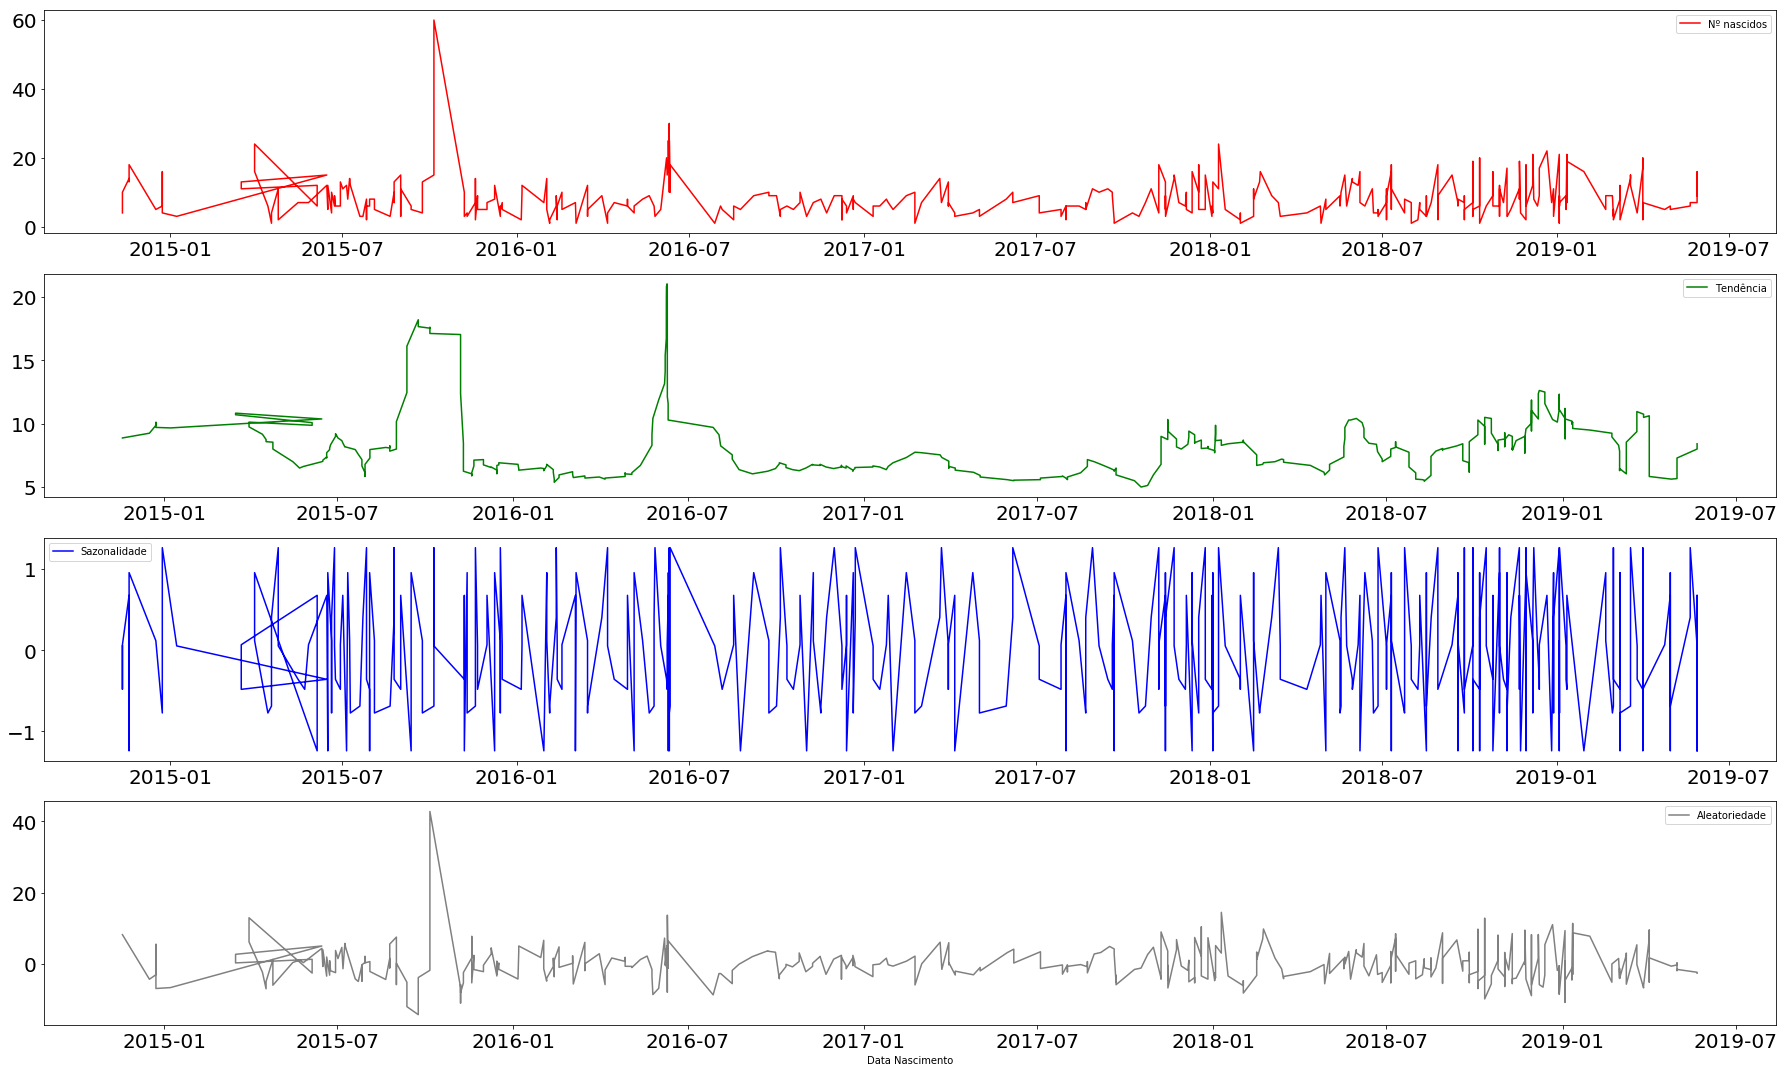

In [11]:
#Plotando gráfico de série temporal por linhagem
'''
'129/SV-E', 'AG129', 'Balb/c', 'C3H', 'C57BL/6'
'DBA/1J', 'S129KO', 'Swiss-1 A', 'Swiss-1 B',
'Swiss-1 C, 'Swiss-1 D', 'Swiss-1 E', 'Swiss-2 A
'Swiss-2 B', 'Swiss-2 C', 'Swiss-2 D','Swiss-2 E'
'''

#Filtrando a linhagem da coluna ling e plotando seu numero de nascidos

ser_temp_ling = serie_temp_ling[serie_temp_ling['ling'] == 'Balb/c']['num_nasc'] 
decom = seasonal_decompose(ser_temp_ling, freq=12)

# Plotagem de gráfico ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.figure(figsize=(25, 15))
plt.title('Decomposição da Série Temporal Nascimento de Animais') 
plt.legend(['Decomposição da Série Temporal Nascimento de Animais'])

plt.subplot(4, 1, 1)
plt.plot(ser_temp_ling, label = 'Nº nascidos', color='red')
plt.legend(loc = 'best')

plt.subplot(4, 1, 2)
plt.plot(decom.trend, label = 'Tendência', color='green')
plt.legend(loc = 'best')

plt.subplot(4, 1, 3)
plt.plot(decom.seasonal, label = 'Sazonalidade', color='blue')
plt.legend(loc = 'best')

plt.subplot(4, 1, 4)
plt.plot(decom.resid, label = 'Aleatoriedade', color='grey')
plt.legend(loc = 'best')

plt.xlabel('Data Nascimento')
plt.tight_layout()

In [12]:
#DataFrame criada para testar gráficos para perspectivas 2° semestre

test = pd.DataFrame(tirar_ling['ling'])
test['ling'] = tirar_ling['ling']
test['date_hoje'] = tirar_ling['date_hoje']#criação da DataFrame "tirar_ling com a coluna de data"
test['date_nasc_acas'] = tirar_ling['date_nasc_acas']
test['date_sex'] = tirar_ling['date_sex']
test['num_nasc'] = tirar_ling['num_nasc']#criação de coluna(serie_temp) que estará inserida na DataFrame

#test = test.set_index('ling') #identificando a nova coluna como index data_hoje
test.head()

,ling,date_hoje,date_nasc_acas,date_sex,num_nasc
id,,,,,
116,Swiss E,2014-09-23 17:40:33,2014-09-23 17:40:33,2014-10-14 17:40:33,5
117,Swiss E,2014-09-23 17:40:33,2014-09-23 17:40:33,2014-10-14 17:40:33,10
118,Swiss C,2014-09-23 17:40:33,2014-09-23 17:40:33,2014-10-14 17:40:33,20
119,Swiss E,2014-09-23 17:40:47,2014-09-23 17:40:47,2014-10-14 17:40:47,10
120,Swiss E,2014-09-23 17:40:47,2014-09-23 17:40:47,2014-10-14 17:40:47,20


Text(0, 0.5, 'Quantidade Nascidos')

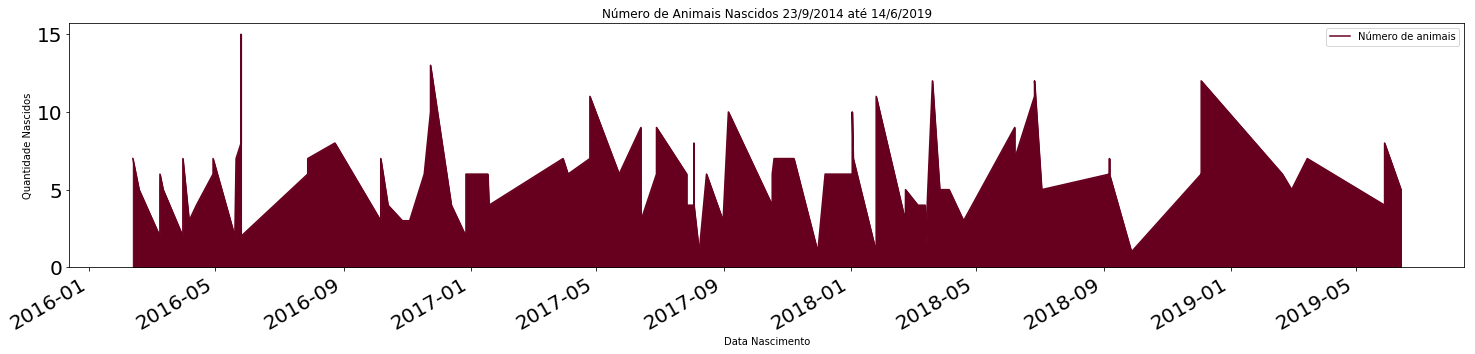

In [13]:
#Nascimentos por linhagem por período mensal/ anual 

inic = test.loc[test.index.min(), "date_hoje"] 
fim = test.loc[test.index.max(), "date_hoje"]
#num_nasc = 
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


#serie_temp_ling.query("ling == 'C57BL/6'").plot( #filtrando a coluna ling e pedindo por linhagem 
test[test['ling'] == 'C3H'].plot(
        kind='area', #tipo de grafico
        x='date_hoje',
        y='num_nasc',
        figsize=(25, 5),
        colormap='RdBu',
        title=f'Número de Animais Nascidos {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}'
        )
#acima no title está sendo indicado por dia, mes e ano da primeira entrada até a última.

plt.legend(['Número de animais'])
plt.xlabel('Data Nascimento')
plt.ylabel('Quantidade Nascidos')

Text(0, 0.5, 'Quantidade Nascidos')

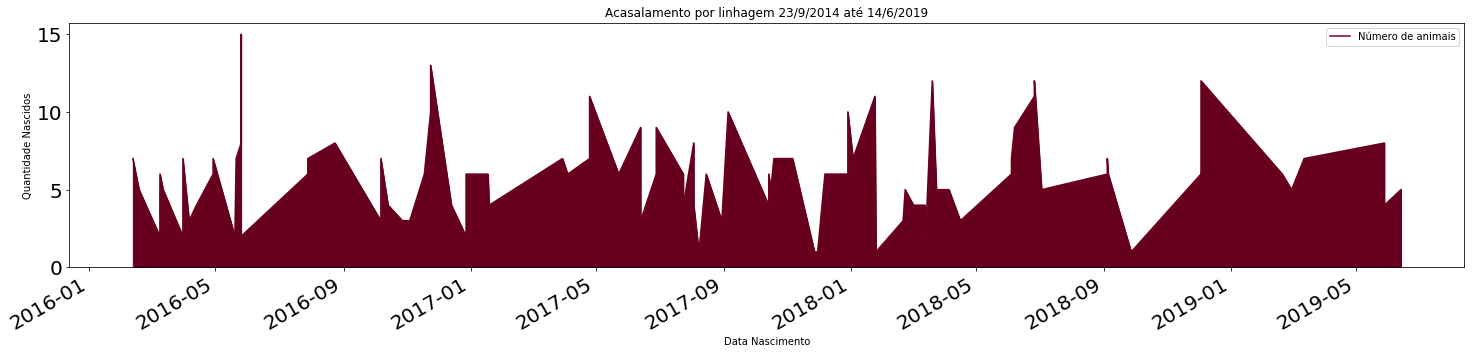

In [14]:
#Acasalamento por período mensal/ anual

acas = pd.DataFrame(test['date_nasc_acas'])
test[test['ling'] == 'C3H'].plot( #ver erro 
        kind='area', #tipo de grafico
        x='date_nasc_acas',
        y='num_nasc',
        figsize=(25, 5),
        colormap='RdBu',
        title=f'Acasalamento por linhagem {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}'
)
plt.legend(['Número de animais'])
plt.xlabel('Data Nascimento')
plt.ylabel('Quantidade Nascidos')

Text(0, 0.5, 'Quantidade Nascidos')

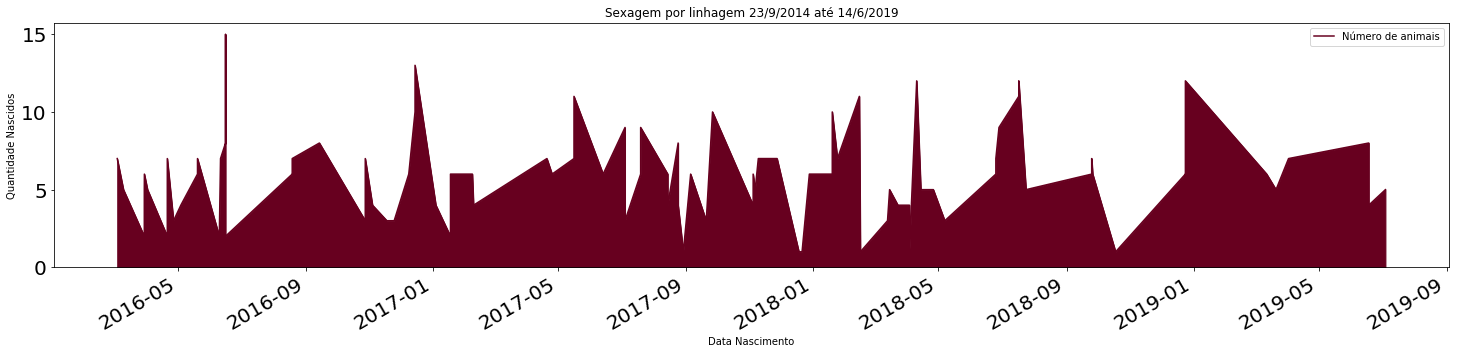

In [15]:
#Sexagem por período mensal/ anual

sexa = pd.DataFrame(test['date_sex'])
test[test['ling'] == 'C3H'].plot( #ver erro 
        kind='area', #tipo de grafico
        x='date_sex',
        y='num_nasc',
        figsize=(25, 5),
        colormap='RdBu',
        title=f'Sexagem por linhagem {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}'
)
plt.legend(['Número de animais'])
plt.xlabel('Data Nascimento')
plt.ylabel('Quantidade Nascidos')

In [16]:
'''
Analisar em diferentes períodos o número de nascimentos em diferentes linhagem e 
frequência de machos e fêmeas
'''


#Filtrando colunas ['num_sex_m'] e ['num_sex_f'] para apresentar os valores menor de 200
num_nasc = eel[(eel['util'] == 'nasc') & (eel['num_sex_m'] < 200) & (eel['num_sex_f'] < 200)]


In [17]:
'''
Verificar o número de animais pedidos entre todas as linhagens em comparação com 
o número de animais produzidos;
'''
eel_ped = pd.read_csv('../tabelas_test/pedido_2019-06-18.csv', index_col='id')
eel_ped.head()

,solic,mail,lab,exter,ling,num_ani,time,total_time,doses,cep,cep_num_ani,id_orig,caix_est,id_fim,caix_exp,data_inicio,data_solic,data_forn,data_fim
id,,,,,,,,,,,,,,,,,,,
2,Tania,tschepainski@gmail.com,Usuário Externo,x,Balb/c,2,dia,3,2,83050140,666,666,AAA,666,AAA,1421625600,1411391851,666,1411392413
6,Hálisson Tesseroli Miot,halissontm@gmail.com,LPEP,-,Swiss,4,mes,2,5,0000000000,666,16,1-3-2-16,106,4-1-1-106,1412121600,1411583300,1412619416,1418727743
4,Tania,tschepainski@gmail.com,Usuário Externo,.,Balb/c,2,dia,2,2,81300,666,666,AAA,666,AAA,1420070400,1411491911,666,1411491957
5,Claudemir de Souza,claudemir.s@tecpar.br,VIROMOL,-,Swiss,11,dia,30,5,555555,666,14,1-2-7-14,113,NaN,1412899200,1411579273,1412620096,1422037389
7,Camila Oliveira,halissontm@gmail.com,LPEP,-,Balb/c,6,mes,2,5,0000000000,666,50,2-3-1-50,108,4-1-3-108,1412121600,1411583355,1412082161,1418727745


In [18]:
'''
Verificar a destinação dos animais pós sexagem;
'''

'\nVerificar a destinação dos animais pós sexagem;\n'

In [24]:
'''
Caracterizar as principais causas de descarte de animais após nascimento e fornecimento; 
'''
eel_desc = pd.read_csv('../tabelas_test/est_est_log_2019-06-18.csv', index_col='id')
eel_desc.head()

eel_desc[eel_desc['obs_desc'] != 'AAA'].head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
53,1409072767,Tania,Swiss E,2,m,1402372800,3,acas,666,666,...,1409072767,1410887167,666,1412701567,666,666,666,666,666,I
54,1409072767,Tania,Swiss E,3,f,1404792000,8,acas,666,666,...,1409072767,1410887167,666,1412701567,666,666,666,666,666,I
55,1409073259,Tania,Swiss E,1,m,1402372800,53,acas,666,666,...,1409073259,1410887659,666,1412702059,666,666,666,666,666,I
56,1409073259,Tania,Swiss E,1,f,1404792000,54,acas,666,666,...,1409073259,1410887659,666,1412702059,666,666,666,666,666,I
57,1409073973,Tania,Swiss D,2,m,1402372800,1,acas,666,666,...,1409073973,1410888373,666,1412702773,666,666,666,666,666,I


In [26]:
'''
Dados dos requisitantes, tipos de uso - associação com linhagens e demanda e tipos de ensaios. 
Necessário ter todas essas linhagens? - Alessandra Aguiar
'''

eel_ped = pd.read_csv('../tabelas_test/pedido_2019-06-18.csv', index_col='id')
eel_ped.head()

eel_ped

,solic,mail,lab,exter,ling,num_ani,time,total_time,doses,cep,cep_num_ani,id_orig,caix_est,id_fim,caix_exp,data_inicio,data_solic,data_forn,data_fim
id,,,,,,,,,,,,,,,,,,,
2,Tania,tschepainski@gmail.com,Usuário Externo,x,Balb/c,2,dia,3,2,83050140,666,666,AAA,666,AAA,1421625600,1411391851,666,1411392413
6,Hálisson Tesseroli Miot,halissontm@gmail.com,LPEP,-,Swiss,4,mes,2,5,0000000000,666,16,1-3-2-16,106,4-1-1-106,1412121600,1411583300,1412619416,1418727743
4,Tania,tschepainski@gmail.com,Usuário Externo,.,Balb/c,2,dia,2,2,81300,666,666,AAA,666,AAA,1420070400,1411491911,666,1411491957
5,Claudemir de Souza,claudemir.s@tecpar.br,VIROMOL,-,Swiss,11,dia,30,5,555555,666,14,1-2-7-14,113,NaN,1412899200,1411579273,1412620096,1422037389
7,Camila Oliveira,halissontm@gmail.com,LPEP,-,Balb/c,6,mes,2,5,0000000000,666,50,2-3-1-50,108,4-1-3-108,1412121600,1411583355,1412082161,1418727745
8,Eloise P. G. Slompo,epgslompo@tecpar.br,LPEP,-,Swiss,3,mes,3,5,A confirmar,666,196,5-7-8-196,107,4-1-2-107,1414108800,1411761400,1412018489,1417609413
9,Phileno,tschepainski@gmail.com,Usuário Externo,UEL,Swiss,25,mes,2,3,3433,666,20,1-3-6-20,1,1-1-1-1,1412640000,1411997594,1412184811,1412184811
10,Phileno,tschepainski@gmail.com,Usuário Externo,UEL,Balb/c,120,dia,40,12,00000,666,54,2-3-5-54,1,1-1-1-1,1417392000,1412018821,1412185905,1412185905
24,Fabíola Barbieri Holetz,biaholetz@gmail.com,LABREG,-,Swiss,2,dia,2,0,LW-15/13,666,701017,1-1-7-7<br />1-1-7-7,1150101115,<br />4-2-3-115,1417150800,1416943388,1417608891,1422037741
